<a href="https://colab.research.google.com/github/JuanQuiroga12/DeepLearning/blob/main/Proyecto1DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto 1 | MLP para clasificacion de | Juan Quiroga y Marielby Paz

Importacion de librerias

In [33]:
# Integrantes: Juan David Quiroga González y Marielby Paz
# Importación de librerías
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

Dataset | load_digits de scikit-learn

In [2]:
# Cargar dataset
digits = load_digits()
X = digits.data
y = digits.target

Normalizacion

In [3]:
# Normalizar los datos
X = X.astype('float32') / 16.0  # Los valores originales están entre 0-16

Division de los datos (70%/15%/15%)

In [4]:
# Dividir en train, validation y test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

Conversión de las etiquetas One-hot Coding

In [5]:
# Convertir etiquetas a one-hot encoding
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_val = to_categorical(y_val, num_classes)
y_test = to_categorical(y_test, num_classes)

Creación del mejor modelo

In [22]:
print("Dimensiones de los datos:")
print(f"X_train: {X_train.shape}")
print(f"X_val: {X_val.shape}")
print(f"X_test: {X_test.shape}")

def create_model():
    model = Sequential([
        # Primera capa
        Dense(256, activation='relu', kernel_initializer='he_uniform', input_shape=(64,)),
        BatchNormalization(),
        Dropout(0.2),

        # Segunda capa
        Dense(128, activation='relu', kernel_initializer='he_uniform'),
        BatchNormalization(),
        Dropout(0.2),

        # Tercera capa
        Dense(64, activation='relu', kernel_initializer='he_uniform'),
        BatchNormalization(),
        Dropout(0.2),

        # Capa de salida
        Dense(num_classes, activation='softmax')
    ])

    # Compilar modelo
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer,
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

    return model

Dimensiones de los datos:
X_train: (1257, 64)
X_val: (270, 64)
X_test: (270, 64)


Compilación y entrenamiento del modelo

In [23]:
# Crear y entrenar modelo
model = create_model()

# Callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    restore_best_weights=True
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=0.00001
)

Entrenamiento

In [24]:
# Entrenamiento
history = model.fit(
    X_train, y_train,
    batch_size=32,
    epochs=50,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.3649 - loss: 2.0346 - val_accuracy: 0.8222 - val_loss: 1.1850 - learning_rate: 0.0010
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8339 - loss: 0.6013 - val_accuracy: 0.9037 - val_loss: 0.7063 - learning_rate: 0.0010
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8974 - loss: 0.3849 - val_accuracy: 0.9370 - val_loss: 0.4697 - learning_rate: 0.0010
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9314 - loss: 0.2993 - val_accuracy: 0.9519 - val_loss: 0.2987 - learning_rate: 0.0010
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9404 - loss: 0.2490 - val_accuracy: 0.9630 - val_loss: 0.1997 - learning_rate: 0.0010
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9506 - loss: 0.1986 - val_accuracy: 0.9667 - val_loss: 0.1598 - learning_rate: 0.0010
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9694 - loss: 0.1371 - val_accuracy:

In [25]:
# Imprimir resumen del modelo
# No. unidades capa entrada * No. unidades capa salida + No. unidades capa salida (bias)
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 256)                 │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,912 (698.88 KB)

 Trainable params: 59,338 (231.79 KB)

 Non-trainable params: 896 (3.50 KB)

 Optimizer params: 118,678 (463.59 KB)

Evolución del algoritmo

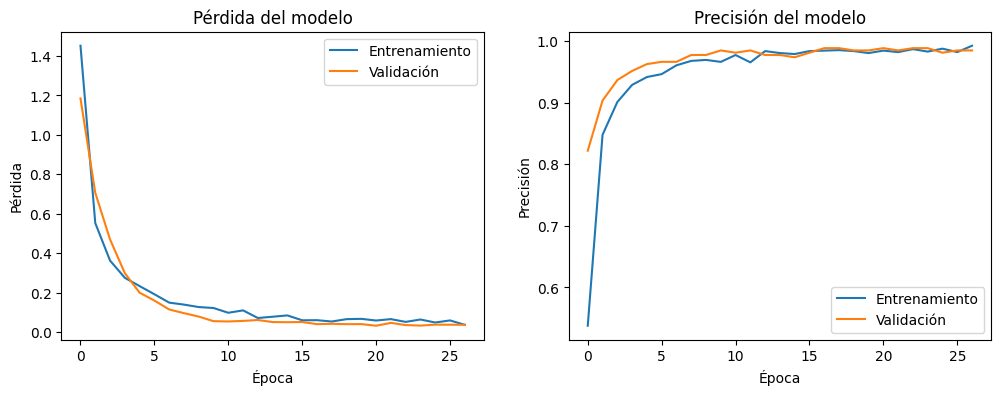

In [26]:
# Gráfica de pérdida y precisión
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida del modelo')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión del modelo')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.show()

In [27]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nPrecisión en conjunto de prueba: {test_acc:.4f}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9908 - loss: 0.0302 

Precisión en conjunto de prueba: 0.9889


Prueba del modelo

In [28]:
def plot_predictions(x, y_true, y_pred, n=5):
    plt.figure(figsize=(15, 3))
    for i in range(n):
        plt.subplot(1, n, i + 1)
        img = x[i].reshape(8, 8)
        plt.imshow(img, cmap='gray')
        plt.title(f'Real: {np.argmax(y_true[i])}\nPred: {np.argmax(y_pred[i])}')
        plt.axis('off')
    plt.show()

Predicciones de los datos seleccionados

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


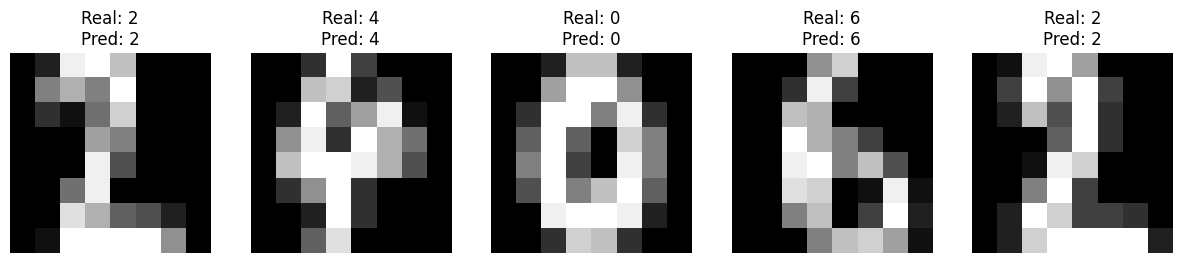

In [29]:
# Hacer algunas predicciones
predictions = model.predict(X_test[:5])
plot_predictions(X_test[:5], y_test[:5], predictions)

Guardar el modelo

In [30]:
model.save('digits_mlp_model.h5')

Resultados finales resumidos

In [31]:
# Calcular accuracy en cada conjunto
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
val_loss, val_acc = model.evaluate(X_val, y_val, verbose=0)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

print("\nResultados finales:")
print(f"Accuracy en entrenamiento: {train_acc:.4f}")
print(f"Accuracy en validación: {val_acc:.4f}")
print(f"Accuracy en prueba: {test_acc:.4f}")


Resultados finales:
Accuracy en entrenamiento: 1.0000
Accuracy en validación: 0.9889
Accuracy en prueba: 0.9889
